In [2]:
import mountaincar
import numpy as np
import starter as st
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
agent = st.Agent()
learning_curve = agent.learn()
plt.plot(learning_curve)
plt.show()

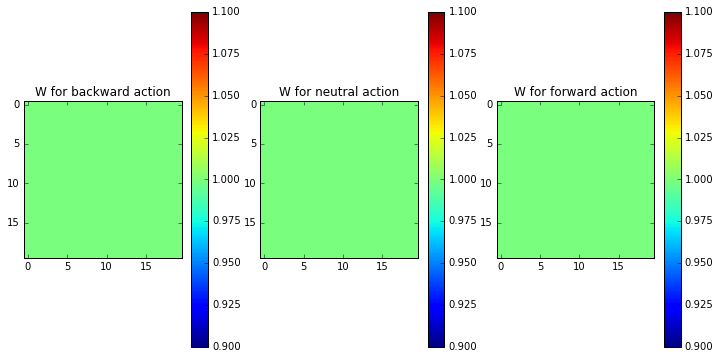

In [4]:
st.plot_weights(agent)
plt.show()

# 1. Escape latency vs. trial number (i.e., learning curve)

* First using default values

In [ ]:
learning_curves = st.batch_agents()
st.plot_learning_curves(learning_curves)
plt.show()

# 2. Policy vs. state

In [3]:
agent = st.Agent()

* Initial vector field

In [ ]:
st.plot_vector_field(agent)
plt.show()

* After 10 trials 

In [ ]:
agent.learn(n_trials=10)
st.plot_vector_field(agent)
plt.show()

* After 10 trials 

In [ ]:
agent.learn(n_trials=10)
st.plot_vector_field(agent)
plt.show()

* After 10 trials 

In [ ]:
agent.learn(n_trials=10)
st.plot_vector_field(agent)
plt.show()

# 3. Exploration vs. exploitation (temperature parameter)

* $\tau = 1$

In [ ]:
learning_curves = st.batch_agents(temp=1)
st.plot_learning_curves(learning_curves)
plt.show()

* $\tau = \infty$

In [ ]:
learning_curves = st.batch_agents(temp=np.inf)
st.plot_learning_curves(learning_curves)
plt.show()

* $\tau = 0$

In [ ]:
learning_curves = st.batch_agents(temp=0)
st.plot_learning_curves(learning_curves)
plt.show()

* Time decaying $\tau$

In [ ]:
# Linear decay
learning_curves = st.batch_agents(temp=1e3, temp_fun=st.lin_temp_decay)
st.plot_learning_curves(learning_curves)
plt.show()

In [ ]:
# Exponential decay
learning_curves = st.batch_agents(temp=1e3, temp_fun=st.exp_temp_decay)
st.plot_learning_curves(learning_curves)
plt.show()

# 4. Effect of eligibility trace decay rate on learning curves

* $\lambda = 0.95$

In [ ]:
learning_curves = st.batch_agents(el_tr_rate=0.95)
st.plot_learning_curves(learning_curves)
plt.show()

* $\lambda = 0$

In [ ]:
learning_curves = st.batch_agents(el_tr_rate=0.0)
st.plot_learning_curves(learning_curves)
plt.show()

# 5. Effect of the initialization of weights on learning curves

* $w_{a_i, j} = 0, \forall i,j$

In [ ]:
learning_curves = st.batch_agents(W=np.zeros((3, 90*15)))
st.plot_learning_curves(learning_curves)
plt.show()

* $w_{a_i, j} = 1, \forall i,j$

In [ ]:
learning_curves = st.batch_agents(W=np.ones((3, 90*15)))
st.plot_learning_curves(learning_curves)
plt.show()